<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Datascience-assignments-11-to-15/blob/main/KNNClassifier(Zoodata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [3]:
path = r"/content/Zoo.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [7]:
X = np.where(X == True, 1, 0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [13]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.95      0.95      0.95        21



In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

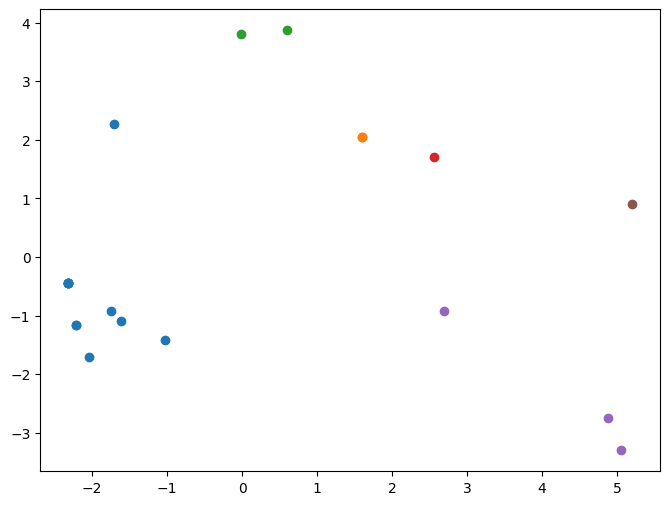

In [15]:
plt.figure(figsize=(8, 6))
for target in set(y_pred):
    indices = (y_pred == target)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'Class {target}')
